In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import PassiveAggressiveClassifier 
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("../data/TRAIN.csv")

In [6]:
df.head()

,id,text,category
0,3973,1047 6700 4178 2912 183 6700,0
1,4462,4035 4563 1994 154 5373 4956 6035 4393 4017 40...,1
2,2889,5035 7685 3139 4407 254 584 6589 8518 3078,0
3,3457,1047 2540 2578 6700 2242 230 3771 4676 5881 64...,0
4,1555,7685 5868 237 6794 3078,0


<AxesSubplot:xlabel='category', ylabel='count'>

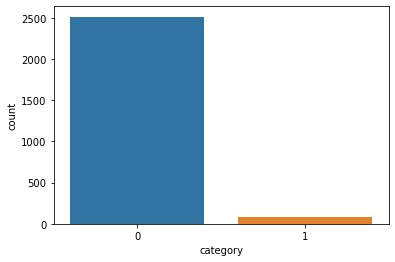

In [8]:
sns.countplot(x='category',data=df)

Its highly imbalanced

In [9]:
X = df['text']
y = df['category']

In [39]:
def run_model(dataframe,target,vectorizer,model):
    X = dataframe
    y = target
    X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
    vector = vectorizer(max_df=0.91, min_df=0.01)
    
    ## vectorization
    X_train_vector = vector.fit_transform(X_train).toarray()
    X_test_vector = vector.transform(X_test).toarray()
    
    #model training and prediction
    model.fit(X_train_vector,y_train)
    prediction = model.predict(X_test_vector)
    
    # f1 score
    f1 = f1_score(y_test,prediction,average='weighted')
    print(f"f1_score: {f1}")
    print(f"Model:{model} using {vectorizer}")
    print("*"*40)
    
    
    
    

In [56]:

models = [MultinomialNB(), GaussianNB(),LogisticRegression(),SGDClassifier(), RandomForestClassifier(),PassiveAggressiveClassifier(),XGBClassifier()]
vectorizers = [TfidfVectorizer,CountVectorizer]
for vectorizer in vectorizers:
    for model in models:
        run_model(X,y,vectorizer,model)
        
        
        

f1_score: 0.95997910280863
Model:MultinomialNB() using <class 'sklearn.feature_extraction.text.TfidfVectorizer'>
****************************************
f1_score: 0.9175473217881596
Model:GaussianNB() using <class 'sklearn.feature_extraction.text.TfidfVectorizer'>
****************************************
f1_score: 0.9707653839284488
Model:LogisticRegression() using <class 'sklearn.feature_extraction.text.TfidfVectorizer'>
****************************************
f1_score: 0.987259479650784
Model:SGDClassifier() using <class 'sklearn.feature_extraction.text.TfidfVectorizer'>
****************************************
f1_score: 0.9674213748305995
Model:RandomForestClassifier() using <class 'sklearn.feature_extraction.text.TfidfVectorizer'>
****************************************
f1_score: 0.9830126395343787
Model:PassiveAggressiveClassifier() using <class 'sklearn.feature_extraction.text.TfidfVectorizer'>
****************************************


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:27:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
f1_score: 0.9751322470632815
Model:XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) using <class 'sklearn.feature_extraction.text.TfidfVectorizer'>
*********

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:27:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
f1_score: 0.9787657994179734
Model:XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) using <class 'sklearn.feature_extraction.text.CountVectorizer'>
*********

In [66]:
# pas_clf = PassiveAggressiveClassifier(C = 0.1, max_iter=1000,warm_start=True,shuffle=False,tol=None,random_state = 0)
pas_clf = PassiveAggressiveClassifier(class_weight={0:0.7,1:0.3},random_state=0)
vector = TfidfVectorizer(max_df=0.91, min_df=0.01)
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train_vector = vector.fit_transform(X_train).toarray()
X_test_vector = vector.transform(X_test).toarray()
pas_clf.fit(X_train_vector, y_train)
pas_clf_pred = pas_clf.predict(X_test_vector)
score = f1_score(y_test, pas_clf_pred,average='weighted')
print("f1_score:",score)

f1_score: 0.9848399580383786


In [71]:
pas_clf = PassiveAggressiveClassifier(C = 0.1, max_iter=1000,warm_start=True,shuffle=False,tol=None,random_state = 0)
# pas_clf = PassiveAggressiveClassifier(random_state=0)
vector = CountVectorizer()
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train_vector = vector.fit_transform(X_train).toarray()
X_test_vector = vector.transform(X_test).toarray()
pas_clf.fit(X_train_vector, y_train)
pas_clf_pred = pas_clf.predict(X_test_vector)
score = f1_score(y_test, pas_clf_pred,average='weighted')
print("f1_score:",score)

f1_score: 0.9854112717665362


In [72]:
# pas_clf = PassiveAggressiveClassifier(C = 0.1, max_iter=1000,warm_start=True,shuffle=False,tol=None,random_state = 0)
pas_clf = PassiveAggressiveClassifier(random_state=0)
vector = CountVectorizer()
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train_vector = vector.fit_transform(X_train).toarray()
X_test_vector = vector.transform(X_test).toarray()
pas_clf.fit(X_train_vector, y_train)
pas_clf_pred = pas_clf.predict(X_test_vector)
score = f1_score(y_test, pas_clf_pred,average='weighted')
print("f1_score:",score)

f1_score: 0.987259479650784


In [84]:
# pas_clf = PassiveAggressiveClassifier(C = 0.1, max_iter=1000,warm_start=True,shuffle=False,tol=None,random_state = 0)
pas_clf = SGDClassifier(random_state=0)
vector = TfidfVectorizer(max_df=0.91, min_df=0.01,max_features=1000)
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train_vector = vector.fit_transform(X_train).toarray()
X_test_vector = vector.transform(X_test).toarray()
pas_clf.fit(X_train_vector, y_train)
pas_clf_pred = pas_clf.predict(X_test_vector)
score = f1_score(y_test, pas_clf_pred,average='weighted')
print("f1_score:",score)

f1_score: 0.9836202081746636


In [77]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier 
from sklearn.linear_model import SGDClassifier
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 

# X_train, X_test,y_train, y_test = tts(X,y, test_size=0.10, random_state=43)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score

pas_clf = PassiveAggressiveClassifier(C = 0.1, max_iter=1000,warm_start=True,shuffle=False,tol=None,random_state = 0)
pas_clf = PassiveAggressiveClassifier()
pas_clf.fit(X_train_vector, y_train)
pas_clf_pred = pas_clf.predict(X_test_vector)
score = f1_score(y_test, pas_clf_pred,average="weighted")
print("score:",score)

score: 0.9830126395343787


In [81]:
df_test = pd.read_csv('../data/test.csv')


In [82]:
X_vect = vector.fit_transform(X).toarray()
df_test = vector.transform(df_test['text']).toarray()
pas_clf.fit(X_vect, y)
pas_test_pred = pas_clf.predict(df_test)

In [83]:

output = pd.DataFrame(data={"category":pas_test_pred})
output

,category
0,0
1,0
2,0
3,1
4,0
...,...
861,0
862,0
863,0
864,0


In [186]:
output.to_csv('submission15.csv',index=False)